In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv("train.csv")
train_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [58]:
train_data.shape

(4250, 20)

In [3]:
train_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
train_data.isna().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [7]:
train_data['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

C:\Users\Arman\AppData\Local\Temp\ipykernel_9700\3607860919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


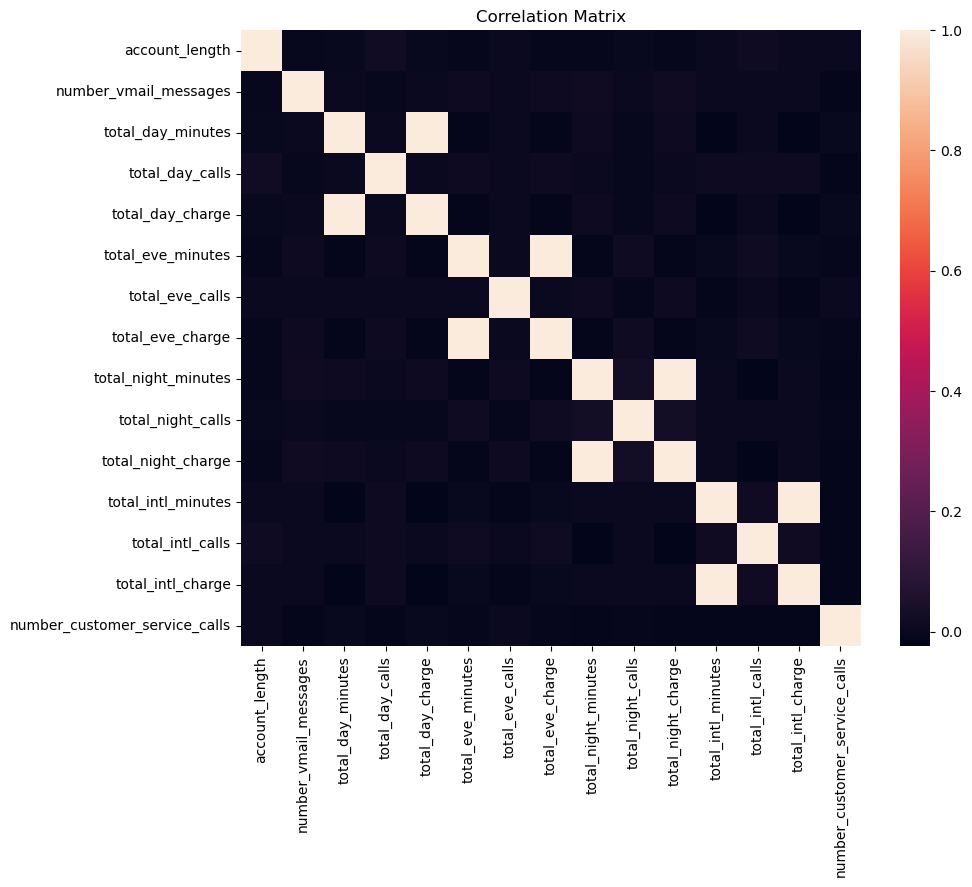

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr())
plt.title('Correlation Matrix')
plt.show()

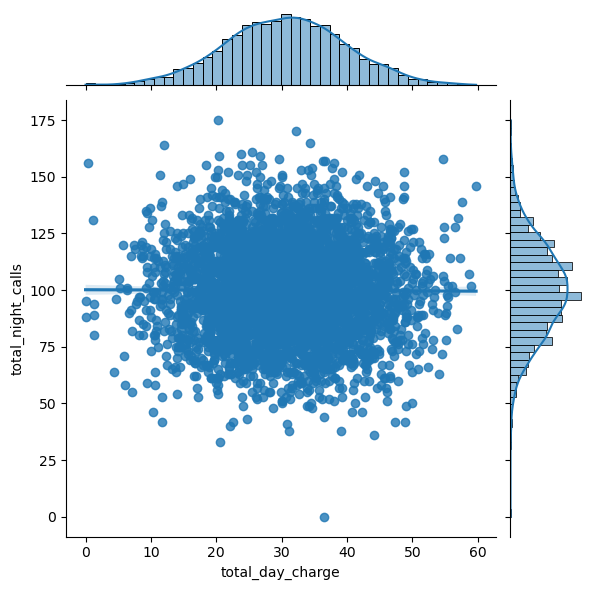

In [54]:
sns.jointplot(data=train_data, x="total_day_charge", y="total_night_calls", kind='reg')

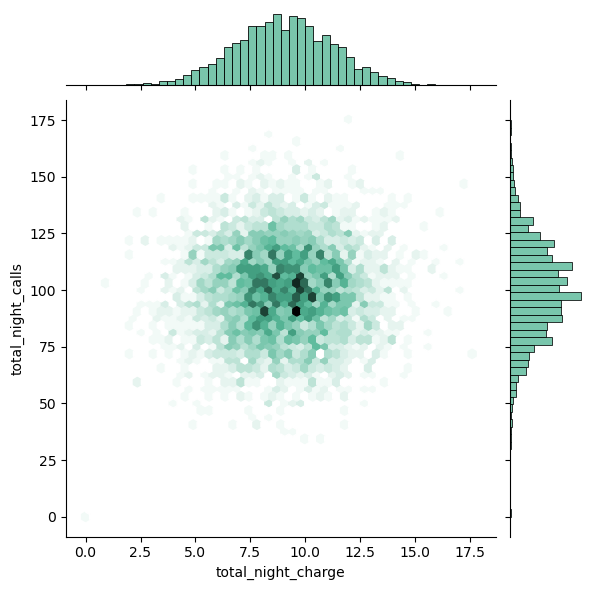

In [79]:
sns.jointplot(data=train_data,x='total_night_charge', y='total_night_calls', kind="hex", color="#4CB391",)

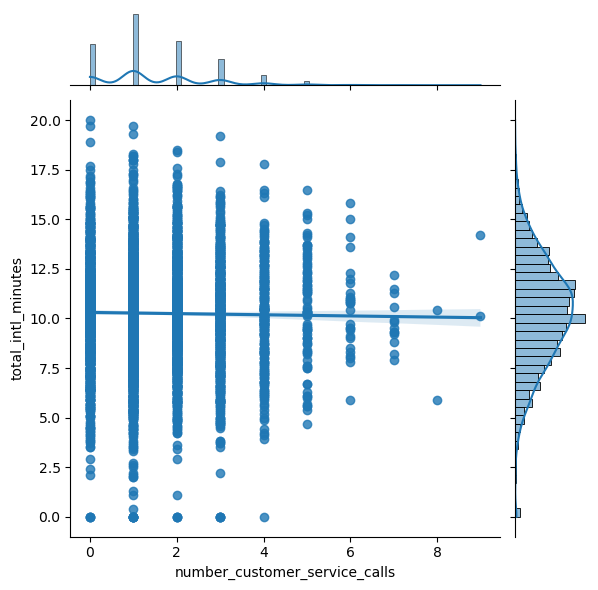

In [77]:
sns.jointplot(data=train_data, x="number_customer_service_calls", y="total_intl_minutes", kind='reg')

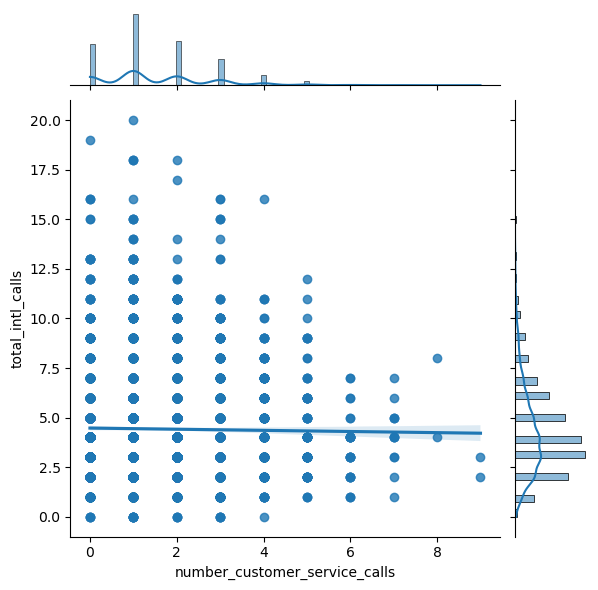

In [78]:
sns.jointplot(data=train_data, x="number_customer_service_calls", y="total_intl_calls", kind='reg')

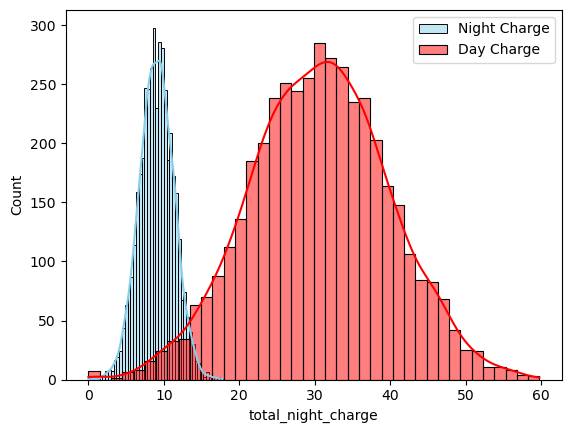

In [51]:
sns.histplot(data=train_data, x="total_night_charge", color="skyblue", label="Night Charge", kde=True)
sns.histplot(data=train_data, x="total_day_charge", color="red", label="Day Charge", kde=True)
plt.legend()

In [92]:
X = train_data.select_dtypes(include=['int64', 'float64'])
y = train_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)


In [93]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Val set:', X_test.shape,  y_test.shape)

Train set: (3400, 15) (3400,)
Val set: (850, 15) (850,)


In [94]:
print(confusion_matrix(y_test,predictions))

[[663  58]
 [ 51  78]]


In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          no       0.93      0.92      0.92       721
         yes       0.57      0.60      0.59       129

    accuracy                           0.87       850
   macro avg       0.75      0.76      0.76       850
weighted avg       0.87      0.87      0.87       850



In [65]:
error_rate = []
for i in range(1,40,2):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

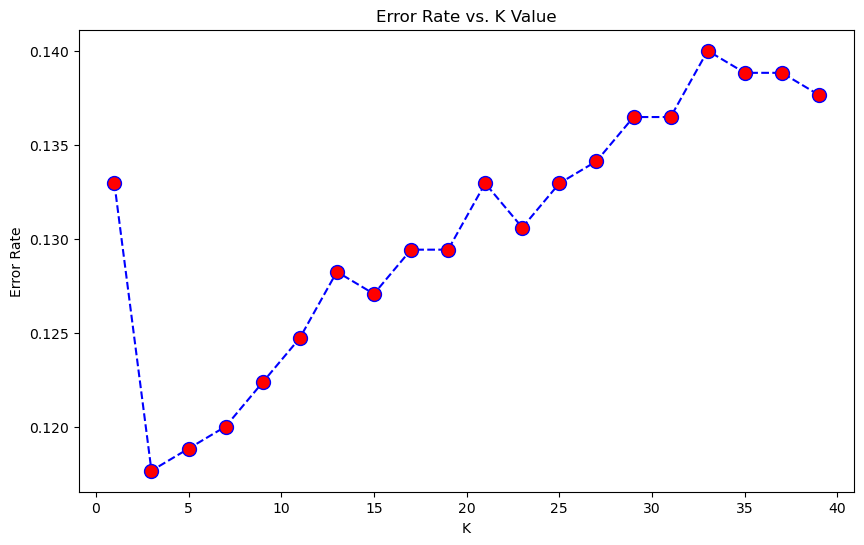

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
X = train_data.select_dtypes(include=['int64', 'float64'])
y = train_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


dt = KNeighborsClassifier(n_neighbors=3)
dt.fit(X_train, y_train)

predictions_2 = dt.predict(X_test)

In [98]:
print(confusion_matrix(y_test,predictions_2))

[[708  13]
 [ 87  42]]


In [90]:
print(classification_report(y_test,predictions_2))

              precision    recall  f1-score   support

          no       0.89      0.96      0.93       721
         yes       0.62      0.34      0.44       129

    accuracy                           0.87       850
   macro avg       0.76      0.65      0.68       850
weighted avg       0.85      0.87      0.85       850



In [104]:
X = train_data.select_dtypes(include=['int64', 'float64'])
y = train_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gradient = GradientBoostingClassifier()
gradient.fit(X_train, y_train)

predictions_3 = gradient.predict(X_test)

In [101]:
print(confusion_matrix(y_test,predictions_3))

[[712   9]
 [ 54  75]]


In [102]:
print(classification_report(y_test,predictions_3))

              precision    recall  f1-score   support

          no       0.93      0.99      0.96       721
         yes       0.89      0.58      0.70       129

    accuracy                           0.93       850
   macro avg       0.91      0.78      0.83       850
weighted avg       0.92      0.93      0.92       850



In [108]:
train_data.churn.replace(['no', 'yes'], [0, 1], inplace=True)
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [110]:
X = train_data.select_dtypes(include=['int64', 'float64'])
y = train_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb = XGBClassifier()
xgb.fit(X_train, y_train)

predictions_4 = xgb.predict(X_test)

In [111]:
print(confusion_matrix(y_test,predictions_4))

[[721   0]
 [  0 129]]


In [112]:
print(classification_report(y_test,predictions_4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       721
           1       1.00      1.00      1.00       129

    accuracy                           1.00       850
   macro avg       1.00      1.00      1.00       850
weighted avg       1.00      1.00      1.00       850



After training 4 models on our data we saw that the best model for our dta is XGboosClassifier,it has the best accuracy and the best f1-score.